<a href="https://colab.research.google.com/github/Ramanmagar/Air-bnb-bookings-Analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## Team Members:

1. Premanand Gaikwad
2. Sanchit Patil
3. Raman Magar
4. Osama Ansari


In [ ]:
#Import the libraries required for further operations of EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# locating/reading the data file for analysis
file_location='/content/drive/MyDrive/Airbnb Bookings Analysis-Premanand Gaikwad/Airbnb NYC 2019.csv'
df=pd.read_csv(file_location)

In [ ]:
# Checking the data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# checking the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- From above information it is seen that data contains:

  Rows = 48895 

  Column = 16 ,  i.e we have 16 informational variables by which we can analyse

In [ ]:
# checking the number of null data in each columns
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

- From above null values information,  it seen that columns ' name ' & ' host_name ' contain less number of null values as compare to null values in the columns ' last_review ' & ' reviews_per_month '. 
- So we will replace the null values in the columns ' name ' & ' host_name ' with the " Unavailable ".
- Columns ' last_review ' & ' reviews_per_month ' contain so many null values so from them we can't conclude any beneficial information so that we willdrop them.

In [ ]:
#Dropping the columns 'last_review' & 'reviews_per_month'
df.drop(['last_review','reviews_per_month'],axis=1,inplace=True)

In [ ]:
# Replacing the null values in columns of 'name' & 'host_name' with "Unavailable"
df["name"].fillna("Unavailable",inplace=True)        # replacing null values of 'name' column
df["host_name"].fillna("Unavailable",inplace=True)    # replacing null values of 'host_name' column

In [ ]:
# Now check the any null value present in data
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

- As seen above, we have cleaned the data.
### Now, let's begin to find some beneficial infomation.
   
  1.First analyse the which host is the busy, for that we will  compare the host with the different variables i.e columns.
  
    1.1 Analyse based on the total number of reviews.

In [ ]:
# Grouping the host_id and number_of reviews to obtain the total number of reviews for perticular host id
busy_host1=df.groupby("host_id")["number_of_reviews"].sum().sort_values(ascending=False).reset_index()

# Again grouping the host id and host name to obatin the name of perticular host id(owner)
owner_name=df.groupby("host_id")["host_name"].unique().reset_index()

# Now merge above both dataframe based on the host id and get top 10 id
busy_host_id1=pd.merge(busy_host1,owner_name, on="host_id", how="left").set_index("host_id").iloc[0:10]
busy_host_id1


,number_of_reviews,host_name
host_id,,
37312959,2273,[Maya]
344035,2205,[Brooklyn& Breakfast -Len-]
26432133,2017,[Danielle]
35524316,1971,[Yasu & Akiko]
40176101,1818,[Brady]
4734398,1798,[Jj]
16677326,1355,[Alex And Zeena]
6885157,1346,[Randy]
219517861,1281,[Sonder (NYC)]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

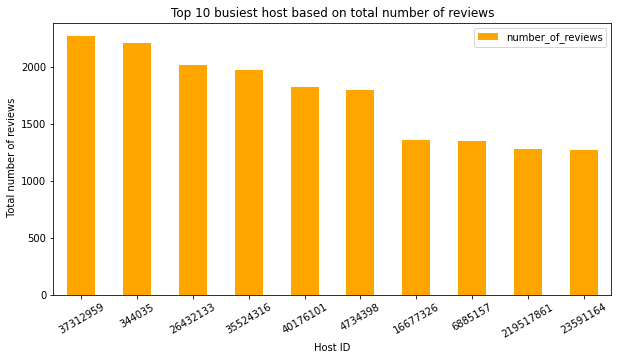

In [ ]:
# Now plot the abov result using bar plot
plt.rcParams['figure.figsize'] = (10, 5)      # defining the size of the graph
busy_host_id1.plot.bar(color="orange")
plt.title("Top 10 busiest host based on total number of reviews")
plt.xlabel("Host ID")
plt.ylabel(" Total number of reviews")
plt.xticks(rotation=30)

[link text](https://)Result 1.1: By considering total number of reviews:

              Host ID = 37312959          
              Host name = Maya,  is the busiest host ( 2273 reviews)




1.2 Analyse based on number of properties listed

In [ ]:
#Grouping the host_id and name of property to obatin number of properties listed by perticular owner(host)
busy_host3=df.groupby("host_id")["name"].count().sort_values(ascending=False).reset_index()

#Grouping the host id to obatin the host name
owner_name=df.groupby("host_id")["host_name"].unique().reset_index()

#Now merge both above dataframe to obtain the top 10 host of higher number of properties listed
busy_host_id3=pd.merge(busy_host3,owner_name, on="host_id", how="left").set_index("host_id").iloc[0:10]
busy_host_id3


,name,host_name
host_id,,
219517861,327,[Sonder (NYC)]
107434423,232,[Blueground]
30283594,121,[Kara]
137358866,103,[Kazuya]
16098958,96,[Jeremy & Laura]
12243051,96,[Sonder]
61391963,91,[Corporate Housing]
22541573,87,[Ken]
200380610,65,[Pranjal]


Text(0, 0.5, ' Number of properties')

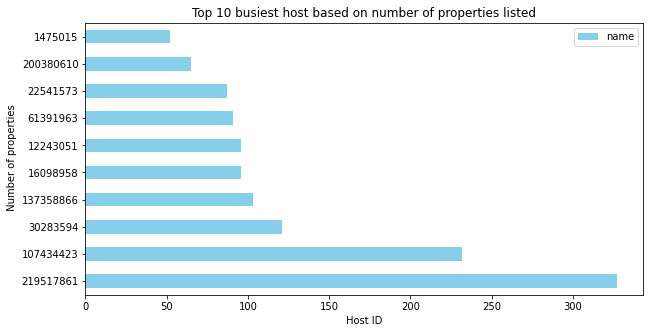

In [ ]:
# Now plot the above result using horizontal bar
plt.rcParams['figure.figsize'] = (10, 5)      # defining the size of the graph

busy_host_id3.plot.barh(color="skyblue")
plt.title("Top 10 busiest host based on number of properties listed")          
plt.xlabel("Host ID")
plt.ylabel(" Number of properties")

Result 1.2: By considering number of properties listed:

             Host ID = 219517861
             Host name = Sonder, listed highest number of properties (327 properties)

1.3 Busiest host group wise

In [ ]:
# Grouping the host_name and groups to obatin busiest host list w.r.t group
host_area = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
host_areas = host_area.sort_values(by='calculated_host_listings_count',ascending=False).head(20)
host_areas

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135
432,Alex,Manhattan,134
9856,Mike,Manhattan,134


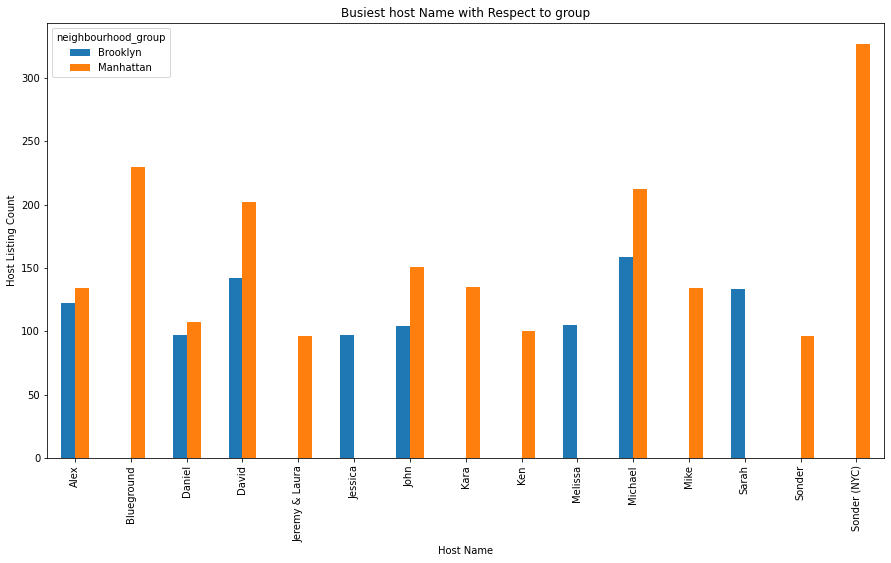

In [ ]:
#ploting the above result using pivot plot
host_areas.pivot(index='host_name',columns='neighbourhood_group',values='calculated_host_listings_count').plot(kind='bar',figsize=(15,8))
plt.title('Busiest host Name with Respect to group')
plt.xlabel('Host Name')
plt.ylabel('Host Listing Count')
plt.show()

Result 1.3 : From above it is seen that, in Manhattan group Sonder NYC is the busiest host and in Brooklyn group Michael is busiest host

Result 1: From above both results it is seen that: 

         Host ID/Name = 219517861 / Sonder    &   37312959 / Maya 
         are the busiest host i.e this host has maximum number of airbnb bookings or customers

2. Analysis of neighbourhhood group has max number of listing and its prices according to that.

1. Check which neighbourhood group has max number of  airbnb booking

In [ ]:
#checking max number of airbnb booking area i.e neighbourhood group by taking value count
busy_neighbourhood_group= df["neighbourhood_group"].value_counts()
busy_neighbourhood_group

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa67ca4d0d0>],
      dtype=object)

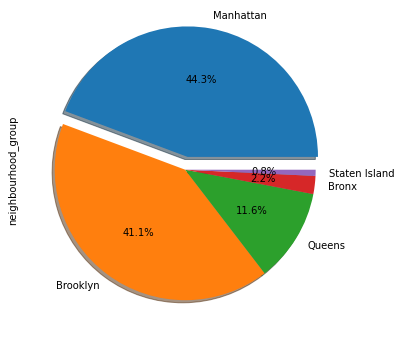

In [ ]:
# now plot the above result by using percentage share and show separate max share area on the pie plot
busy_neighbourhood_group.plot.pie(subplots=True,figsize=(12,6),explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)

Result 2.1: From above pie chart it is seen that 'Manhattan' has max number of booking.

2.2 Check the average booking price in the neighbourhood group

In [ ]:
#grouping the neighbourhood group and price by taking mean of price
mean_bookingprice_of_group=df.groupby("neighbourhood_group")["price"].mean().reset_index(name="Avg booking price")
mean_bookingprice_of_group

,neighbourhood_group,Avg booking price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


Text(0.5, 1.0, 'Average booking price in neighbourhood group')

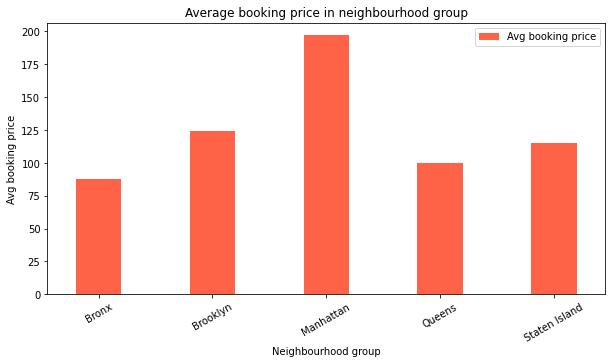

In [ ]:
#now plot the above result on bar plot
mean_bookingprice_of_group.plot.bar(x="neighbourhood_group", y="Avg booking price", width=0.4,color="tomato")
plt.xticks(rotation=30)
plt.xlabel("Neighbourhood group")
plt.ylabel("Avg booking price")
plt.title("Average booking price in neighbourhood group")

Result 2.2 : From above it is seen that airbnb booking in the 'Manhattan' is the expensive amongs the group.

2.3  Now analyse the room type preffered in the neighborhood group.

In [ ]:
# grouping the neighbourhood group and room type by taking count of room type
room_type_preffered=df.groupby("neighbourhood_group")["room_type"].value_counts().unstack()
room_type_preffered

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


Text(0, 0.5, 'No of booking')

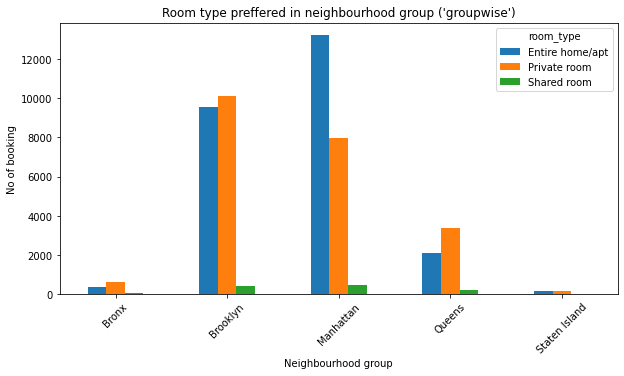

In [ ]:
# plot the above result neighbourhood group wise using joint bar plot
room_type_preffered.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=45)
plt.title("Room type preffered in neighbourhood group ('groupwise')")
plt.xlabel('Neighbourhood group')
plt.ylabel('No of booking')

Text(0, 0.5, 'No of bookings')

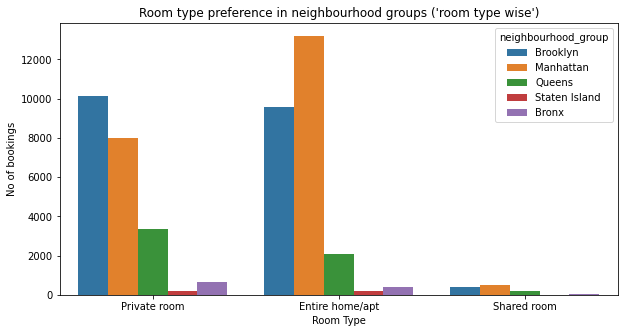

In [ ]:
# obatain the above result room type wise in diffrent groups
ax=sns.countplot(x="room_type",hue="neighbourhood_group",data=df)
plt.title("Room type preference in neighbourhood groups ('room type wise')")
plt.xlabel("Room Type")
plt.ylabel("No of bookings")

Result 2.3 : From above graphs it is seen that in Manhattan group of cities,maximum customer prefer to stay in 'Entire home/apt' and in Brooklyn group of cities  maximum customer prefer to stay in 'Private Room' and customer also prefer to stay in 'Shared room' mostly in Manhattan group of cities

2.4 Checking the maximum number of customer based on reviews for neighbourhhood groups


In [ ]:
# grouping the number of reviews with respect to  neighbourhood groups
traffic_in_group=df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)
traffic_in_group

neighbourhood_group
Brooklyn         486574
Manhattan        454569
Queens           156950
Bronx             28371
Staten Island     11541
Name: number_of_reviews, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

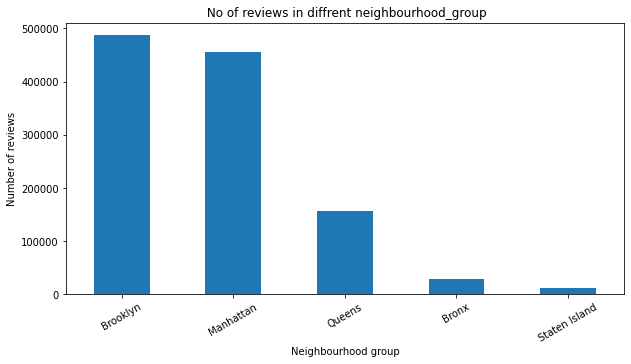

In [ ]:
#plot the above results using bar plot
traffic_in_group.plot.bar()
plt.title(" No of reviews in diffrent neighbourhood_group")
plt.ylabel('Number of reviews')
plt.xlabel('Neighbourhood group')
plt.xticks(rotation=30)

Result 2.4: From above it is seen that Brooklyn has the max number of reviews correspend to the number of customer.

Result 2 : We found that neighbourhood group 'Manhattan' has 44.3% of the total airbnb listing and higher average listing price as compare to other and has a maximum number of entire home/apt stay prefrence

3. Now analyse the cities/neighbourhood which has most airbnb bookings and its relation with other variables i.e columns

  3.1 Obtain the max airbnb booking neighbourhood/cities in neighbourhood group

In [ ]:
# grouping the neighbourhood group and neighbourhood to obatin cities count
most_visited_city=df.groupby(["neighbourhood_group"])["neighbourhood"].value_counts().reset_index(name="count").nlargest(10,"count")
most_visited_city

,neighbourhood_group,neighbourhood,count
48,Brooklyn,Williamsburg,3920
49,Brooklyn,Bedford-Stuyvesant,3714
95,Manhattan,Harlem,2658
50,Brooklyn,Bushwick,2465
96,Manhattan,Upper West Side,1971
97,Manhattan,Hell's Kitchen,1958
98,Manhattan,East Village,1853
99,Manhattan,Upper East Side,1798
51,Brooklyn,Crown Heights,1564
100,Manhattan,Midtown,1545


[Text(0, 0.5, 'No of bookings'),
 Text(0.5, 0, 'Neighbourhood Group'),
 Text(0.5, 1.0, 'Most airbnb booking City with respect to top 2 group')]

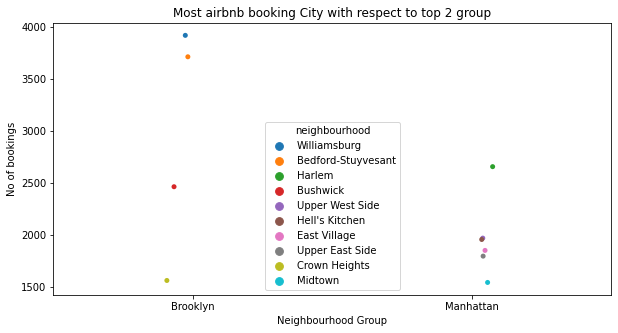

In [ ]:
#plot the above most airbnb booked city in top 2 group using strip plot
ax=sns.stripplot(x="neighbourhood_group", y="count",hue="neighbourhood", data=most_visited_city)
ax.set(title="Most airbnb booking City with respect to top 2 group", xlabel="Neighbourhood Group",ylabel="No of bookings")

Result 3.1  : From above results it is seen that Williamsburg city has max number of booking and its belongs to Brooklyn neighbourhood group and  from Manhattan group harlem is the max number of booking

3.2 check which room type are prefer in top 10 neighbourhood/cities

In [ ]:
 #take top 10 neighbourhood
city=df["neighbourhood"].value_counts().nlargest(10).reset_index(name='count')  

# to find neighbourhood_group present in neighbourhood
group=df[df['neighbourhood'].isin(city['index'])]    
top=group[['host_id','neighbourhood_group','neighbourhood','number_of_reviews','room_type']].sort_values(by='number_of_reviews',ascending=False)
top


,host_id,neighbourhood_group,neighbourhood,number_of_reviews,room_type
2031,4734398,Manhattan,Harlem,607,Private room
2030,4734398,Manhattan,Harlem,597,Private room
2015,4734398,Manhattan,Harlem,594,Private room
471,792159,Brooklyn,Bushwick,480,Private room
225,277379,Manhattan,Harlem,458,Private room
...,...,...,...,...,...
9637,3911807,Brooklyn,Williamsburg,0,Private room
9644,38796373,Manhattan,Midtown,0,Entire home/apt
34702,7098693,Brooklyn,Bedford-Stuyvesant,0,Private room
34700,21858263,Manhattan,East Village,0,Private room


Text(0.5, 1.0, 'Room type preferences in diffrent cities')

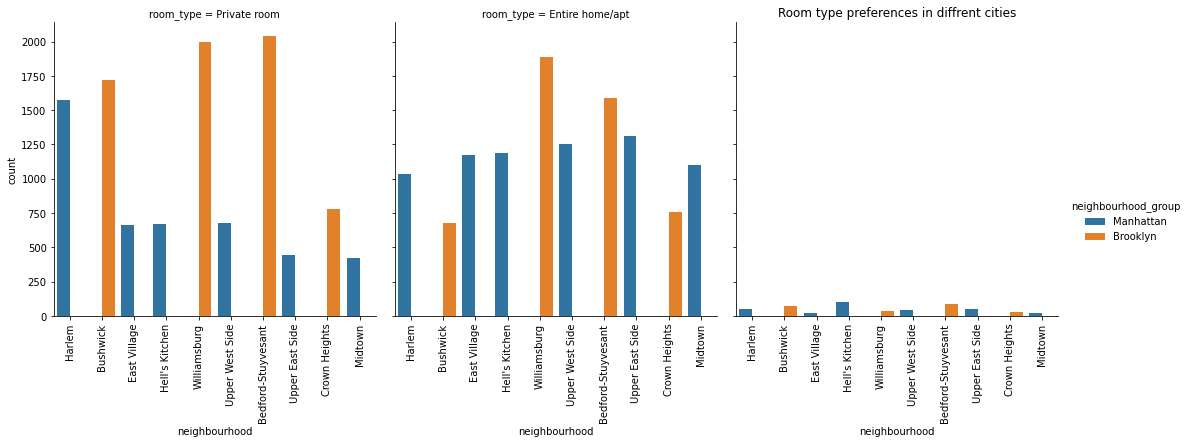

In [ ]:
# Using catplot plot the above result
viz=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=top, kind='count')
viz.set_xticklabels(rotation=90)
plt.title("Room type preferences in diffrent cities")

Result 3.2: From above result it is seen that,

1. In Manhattan group of cities, max room type prefrence cities are =  private  rooms mostly prefer in 'Harlem', entire home/apt mostly prefer in 'Upper East  side', shared rooms are prefer in 'Hell's Kitchen'.
2. In Brooklyn group of cities, max room type prefrence cities are =  private  rooms mostly prefer in 'Bedford-Stuyvesant', entire home/apt mostly prefer in 'Williamsburg', shared rooms are prefer in 'Bedford-Stuyvesant'.


Result 3: We found that Williamsburg from Brooklyn group has maximum airbnb bookings and room type mostly prefer is private rooms and Harlem from Manhattam group also pefer private rooms mostly.

4. Price distribution analysis in different areas

4.1 Price distribution in neighbourhood group

Text(0, 0.5, 'Price')

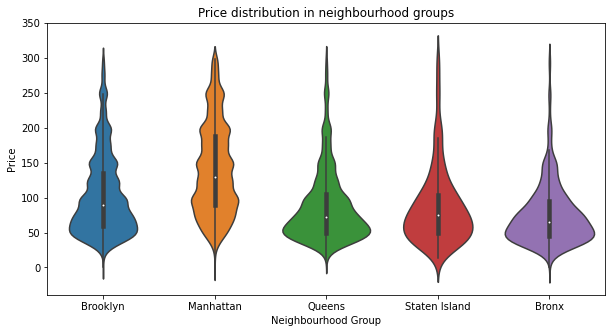

In [ ]:
#plot price distribution amongs the groups using violin plot
sns.violinplot(x="neighbourhood_group",y="price", data=df[df["price"]<300])
plt.title("Price distribution in neighbourhood groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")

Result 4.1: From the graph its shows that 'Manhattan' has booking price is higher. Also 'Manhattan' has a wide variety of price ranges avaliable and it has a moderate bandwidth in higher price range as compared to other group. 'Bronx' group has a higher bandwidth with lower price range. so that it is seen that for luxurious stay people preffered 'manhattan' while for budget stay people preffers other group like Brooklyn,Queens,Staten Island,Bronx

4.2 Prices distribution according to geometrical location.

In [ ]:
# taking the df of prices w.r.t location(longitude, latitude)
location=df.loc[df['price']<300,['latitude','longitude','price']]
location

,latitude,longitude,price
0,40.64749,-73.97237,149
1,40.75362,-73.98377,225
2,40.80902,-73.94190,150
3,40.68514,-73.95976,89
4,40.79851,-73.94399,80
...,...,...,...
48890,40.67853,-73.94995,70
48891,40.70184,-73.93317,40
48892,40.81475,-73.94867,115
48893,40.75751,-73.99112,55


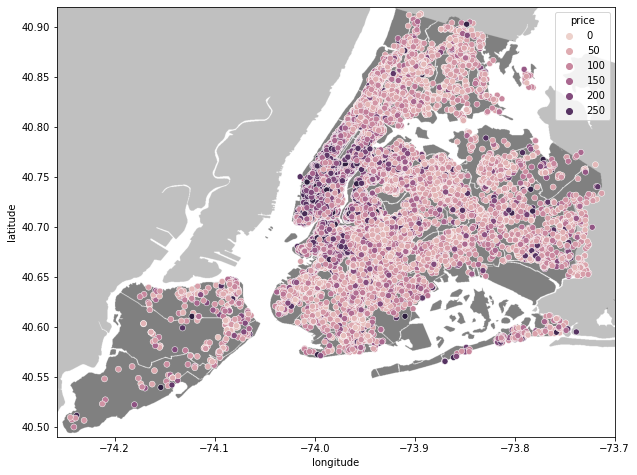

In [ ]:
# Import url calling library
import urllib     

#initializing the figure size
plt.figure(figsize=(10,8))

#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

#ploting the above result
sns.scatterplot(data=location, y='latitude', x='longitude', hue='price', color='red')

Result 4.2 : From above it seen that prices of rooms are higher in Manhattan and area of Brooklyn near to the Manhattan. 

4.3 Average room prices for room types

In [ ]:
# group the room type with price by taking the mean of price
room_avg_price=df.groupby('room_type')['price'].mean().reset_index().set_index('room_type')
room_avg_price

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

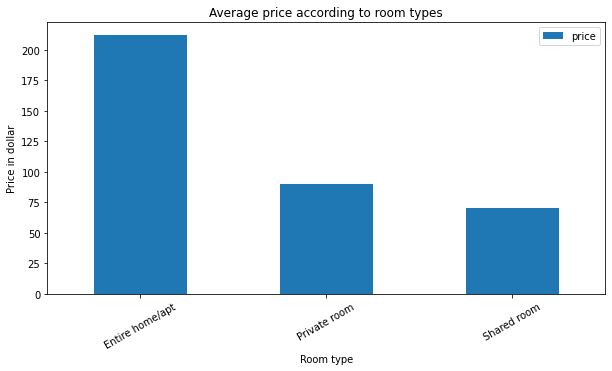

In [ ]:
#plot the avove result using bar plot
room_avg_price.plot.bar()
plt.title('Average price according to room types')
plt.ylabel('Price in dollar')
plt.xlabel('Room type')
plt.xticks(rotation=30)

Result 4.3 : Average room price for entire room/apt is higher than private rooms and shared rooms and as we seen above customers are prefere to stay in entire room/apt.

5. Price distributon box plot

In [ ]:
# average price amongs the group by rooms type
price_box=df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
price_box

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0.5, 0, 'room_type')

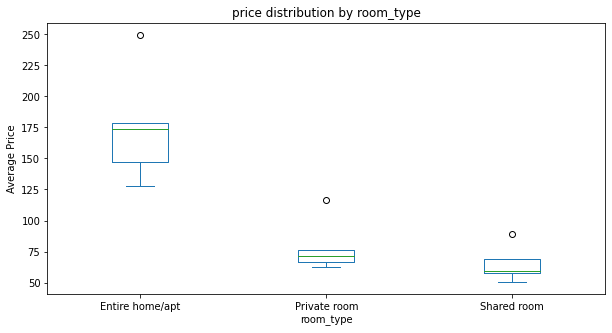

In [ ]:
# plot the above results by box plot
price_box.plot(kind="box")
plt.title('price distribution by room_type')
plt.ylabel('Average Price')
plt.xlabel('room_type')

Result 5 : From above it is seen that max price range is available for entrire home/apt as compared to other room type and average lower price for entire home/apt is also higher than other room types.

6. Check the relation between the price and reviews

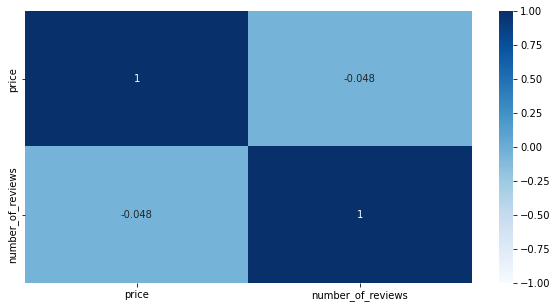

In [ ]:
#checking for correlation between price and reviews
correlation_df=df[['price','number_of_reviews']]
corr_df = correlation_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,vmin=-1, cmap="Blues", annot=True, )

Results 6 : As seen above, therevis negative values thats means price to the reviews relation is inversly proportional. As prices of booking increases less people refere to stay.

### **Conclusion**: 
Data from Airbnb NYC 2019 provides detailed information about the prices, locations, customer preferences for staying, and properties available in various New York cities.We began our EDA by performing a basic check to determine the number of rows (i.e records) and columns (i.e variables), followed by a through examination of the columns to be used in our analysis. Then, we perform data wrangling to check and replace any null values present in the data and also drop some columns.


First, we analysed the host who has the maximum number of customers or bookings by using the number of reviews and the maximum number of properties listed in the host's name by using the count of properties. We found that host names like Maya and Sonder (NYC) have the maximum number of bookings, i.e., 2273, and the maximum number of properties, i.e., 327, respectively. Both hosts belong to the Manhattan group, and in the Brooklyn group, Michael is the busiest host with 159 properties listed.


Then, we explored which neighbourhood group has the maximum number of customers and their preferences for staying and average prices. So we found that Manhattan has the maximum share of customers amongst all other groups, which is 44.3%, and most of the customers prefer to stay in an entire home or apartment. The reasons behind that are that it is a tourist attraction, a commercial centre, a cultural centre, media and entertainment center. In further analysis, we found that Brooklyn has the maximum number of reviews and the corresponding maximum number of customers. After that, we found the maximum number of booking cities from the top groups. As a result of that, in Brooklyn group Williamsburg has the maximum number of customers ( 3920) and in Manhattan  group Harlem has the maximum number of customers (2658). We also analysed the room type preferences. According to that, in Williamsburg and Harlem, entire home or apartments are mostly booked. Business clients prefer to stay in luxurious rooms or apartments, as this city has many industrial areas.


We, also performed the price analysis. We found that staying in Manhattan is expensive as compared to other groups and the average price for the entire home or apartment is more costly than staying in a private room or shared room.
We performed some additional analysis on the correlation between the prices and the number of reviews and property preferences. We found that a higher number of customers preferred to stay in entire home or apartments than private rooms and shared rooms. The relationship between the price and the number of reviews is also inversely proportional, i.e. the higher the price, the fewer people prefer to stay.


Broad view of above data is that, by considering prices and luxuries, Manhattan is the top group because of its financial centre, but most of the customers give good reviews to the Brooklyn group and customers prefer to stay in the area of Brooklyn which is nearer to Manhattan because of the price structure is quite high in Manhattan, aslo room type prefer is entire home or apartment and max number of properties listed owners are Maya, Sonder (NYC) and Michael.


We mined good insights from Airbnb data, and further, this analysis will help in the development of business strategies, correcting decisions, and much more....